### Read in the CSV

In [19]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [20]:
import pandas as pd

SOURCE = '/Users/RichT/Documents/Lambda/kc_house_data.csv'
df = pd.read_csv(SOURCE)

### Data Exploration

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [24]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

### Train/Test split

In [25]:
from sklearn.model_selection import train_test_split
# Train/Test split
traintest = df.copy()
id = df['id'].unique()
train_id, test_id = train_test_split(id, random_state=42, test_size=.1)

train = traintest[traintest['id'].isin(train_id)]
test = traintest[traintest['id'].isin(test_id)]
train.shape, test.shape

((19449, 21), (2164, 21))

In [26]:
# Wrangle function
def wrangle(X):
    X = X.copy()
    
#     engineer date features
    X['date'] = pd.to_datetime(X['date'], format = '%Y%m%d', infer_datetime_format=True)
    X['date_year'] = X['date'].dt.year
    X['date_month'] = X['date'].dt.month
    X = X.drop(columns ='date')
    
    return X
train = wrangle(train)
test = wrangle(test)



In [27]:
import numpy as np

target = 'price'
X_train = train.drop(columns = [target,'id'])
y_train = train[target]
X_test = test.drop(columns=[target, 'id'])
y_test = test[target]

# Log transformation of target vector
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

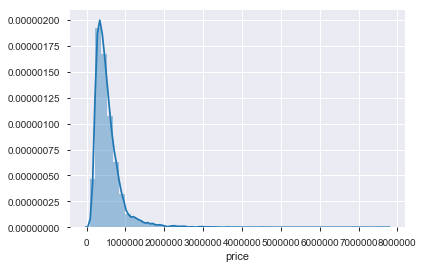

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train);


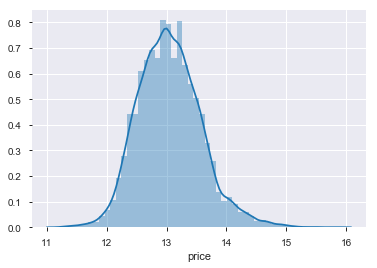

In [29]:
sns.distplot(y_train_log);

### model optimization/validation scores

In [30]:
# Cross Validation Train set
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


pipeline = make_pipeline(ce.OrdinalEncoder(), XGBRegressor(random_state=42, n_jobs=-1))

k=5
groups = train['id']
scores = cross_val_score(pipeline, X_train, y_train_log, cv=k, n_jobs=-1,
                        scoring='neg_mean_squared_error', groups=groups)
print(f'RMSLE for {k} folds:', np.sqrt(-scores))

RMSLE for 5 folds: [0.18733861 0.18620892 0.1804801  0.19055595 0.17355257]


In [31]:
trainval = train.copy()
train, val = train_test_split(trainval)
X_train = train.drop(columns=[target, 'id'])
y_train = train[target]
y_train_log = np.log1p(y_train)
X_val = val.drop(columns=[target, 'id'])
y_val = val[target]
y_val_log = np.log1p(y_val)

In [32]:
# XGBRegressor wih early stopping rounds
import category_encoders as ce
from xgboost import XGBRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

[0]	validation_0-rmse:11.3056	validation_1-rmse:11.3075
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.1764	validation_1-rmse:10.1783
[2]	validation_0-rmse:9.16016	validation_1-rmse:9.1621
[3]	validation_0-rmse:8.24558	validation_1-rmse:8.24772
[4]	validation_0-rmse:7.42247	validation_1-rmse:7.42418
[5]	validation_0-rmse:6.68173	validation_1-rmse:6.68367
[6]	validation_0-rmse:6.01512	validation_1-rmse:6.01711
[7]	validation_0-rmse:5.41524	validation_1-rmse:5.41734
[8]	validation_0-rmse:4.87541	validation_1-rmse:4.87733
[9]	validation_0-rmse:4.38967	validation_1-rmse:4.39117
[10]	validation_0-rmse:3.95256	validation_1-rmse:3.95389
[11]	validation_0-rmse:3.55925	validation_1-rmse:3.56045
[12]	validation_0-rmse:3.20544	validation_1-rmse:3.20681
[13]	validation_0-rmse:2.88715	validation_1-rmse:2.88844
[14]	validation_0-rmse:2.60081	validation_1-rmse:2.602

[138]	validation_0-rmse:0.168582	validation_1-rmse:0.177939
[139]	validation_0-rmse:0.168477	validation_1-rmse:0.177893
[140]	validation_0-rmse:0.168334	validation_1-rmse:0.177741
[141]	validation_0-rmse:0.168195	validation_1-rmse:0.177644
[142]	validation_0-rmse:0.168098	validation_1-rmse:0.177556
[143]	validation_0-rmse:0.167998	validation_1-rmse:0.177465
[144]	validation_0-rmse:0.167894	validation_1-rmse:0.177436
[145]	validation_0-rmse:0.167555	validation_1-rmse:0.177172
[146]	validation_0-rmse:0.16724	validation_1-rmse:0.176873
[147]	validation_0-rmse:0.167117	validation_1-rmse:0.17675
[148]	validation_0-rmse:0.167028	validation_1-rmse:0.176656
[149]	validation_0-rmse:0.166901	validation_1-rmse:0.176609
[150]	validation_0-rmse:0.166799	validation_1-rmse:0.176557
[151]	validation_0-rmse:0.166685	validation_1-rmse:0.176453
[152]	validation_0-rmse:0.166571	validation_1-rmse:0.17637
[153]	validation_0-rmse:0.166434	validation_1-rmse:0.176321
[154]	validation_0-rmse:0.166298	validation

[276]	validation_0-rmse:0.153796	validation_1-rmse:0.168538
[277]	validation_0-rmse:0.153749	validation_1-rmse:0.168511
[278]	validation_0-rmse:0.153673	validation_1-rmse:0.168472
[279]	validation_0-rmse:0.15364	validation_1-rmse:0.16847
[280]	validation_0-rmse:0.1536	validation_1-rmse:0.168435
[281]	validation_0-rmse:0.153563	validation_1-rmse:0.168426
[282]	validation_0-rmse:0.153524	validation_1-rmse:0.168381
[283]	validation_0-rmse:0.153476	validation_1-rmse:0.16837
[284]	validation_0-rmse:0.153423	validation_1-rmse:0.168406
[285]	validation_0-rmse:0.153358	validation_1-rmse:0.168414
[286]	validation_0-rmse:0.153288	validation_1-rmse:0.168387
[287]	validation_0-rmse:0.153179	validation_1-rmse:0.168275
[288]	validation_0-rmse:0.153062	validation_1-rmse:0.168214
[289]	validation_0-rmse:0.153	validation_1-rmse:0.16819
[290]	validation_0-rmse:0.152823	validation_1-rmse:0.168018
[291]	validation_0-rmse:0.152756	validation_1-rmse:0.167984
[292]	validation_0-rmse:0.152722	validation_1-rms

[414]	validation_0-rmse:0.146223	validation_1-rmse:0.16551
[415]	validation_0-rmse:0.146176	validation_1-rmse:0.165497
[416]	validation_0-rmse:0.146109	validation_1-rmse:0.165455
[417]	validation_0-rmse:0.146081	validation_1-rmse:0.165433
[418]	validation_0-rmse:0.146042	validation_1-rmse:0.165428
[419]	validation_0-rmse:0.146004	validation_1-rmse:0.165424
[420]	validation_0-rmse:0.145983	validation_1-rmse:0.165428
[421]	validation_0-rmse:0.145929	validation_1-rmse:0.165469
[422]	validation_0-rmse:0.145867	validation_1-rmse:0.165469
[423]	validation_0-rmse:0.145821	validation_1-rmse:0.165459
[424]	validation_0-rmse:0.145778	validation_1-rmse:0.165428
[425]	validation_0-rmse:0.145725	validation_1-rmse:0.165411
[426]	validation_0-rmse:0.145695	validation_1-rmse:0.16539
[427]	validation_0-rmse:0.145656	validation_1-rmse:0.165382
[428]	validation_0-rmse:0.145604	validation_1-rmse:0.165363
[429]	validation_0-rmse:0.145586	validation_1-rmse:0.165367
[430]	validation_0-rmse:0.14553	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [33]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_train_log)
feature_names = X_train_encoded.columns.tolist()
show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1756 ± 0.0022,lat
0.0535 ± 0.0004,sqft_living
0.0315 ± 0.0010,grade
0.0187 ± 0.0005,sqft_lot
0.0146 ± 0.0001,long
0.0065 ± 0.0001,sqft_living15
0.0062 ± 0.0000,zipcode
0.0053 ± 0.0002,yr_built
0.0053 ± 0.0000,view
0.0035 ± 0.0001,condition


In [35]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Get the test error (one time, at the end)
X_test_encoded = encoder.transform(X_test)
y_pred_log = model.predict(X_test_encoded)
print('Test RMSLE:', rmse(y_test_log, y_pred_log))

Test RMSLE: 0.16367518084167398
